## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regssion

In [2]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [3]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


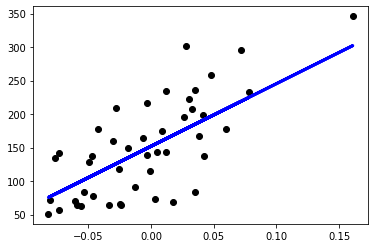

In [4]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [5]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

c:\Users\test\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333


## [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [7]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

c:\Users\test\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！